# Classical Statistical Inference: Confidence intervals

## Table of Content

- II. What is statistical inference ?
    * II.1 Point estimate: See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)
    * II.2 [Confidence interval](#II.2-Confidence-interval:)
        - [II.2.1 Normal distribution with a known variance](#II.2.1-Normal-distribution-with-a-known-variance)
        - [II.2.2. Interpretation of CI](#II.2.2-Interpretation-of-CI)
        - [II.2.3 Normal distribution with an unknown variance](#II.2.3-Normal-distribution-with-unknown-variance)
        - II.2.4 Confidence interval for variances: See [Frequentist_inference_03.ipynb](Frequentist_inference_03.ipynb)
        - II.2.5 Confidence interval between 2 means: See [Frequentist_inference_03.ipynb](Frequentist_inference_03.ipynb)
        - II.2.6 Confidence interval for proportions. See [Frequentist_inference_03.ipynb](Frequentist_inference_03.ipynb)
        
    * II.3 Hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 
    * II.4 Uncertainty calculation using Monte-Carlo method. See [Frequentist_inference_Monte_Carlo.ipynb](Frequentist_inference_Monte_Carlo.ipynb)
    * II.5 Bootstrap and Jacknife: See [Frequentist_inference_Bootstrap.ipynb](Frequentist_inference_Bootstrap.ipynb)  
    * II.6 Wrap up: Various approaches of hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
     
- X. [References and supplementary material](#X)

In [5]:
# Some initialisation for interactive cells
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


## II. What is statistical inference ?  <a class="anchor" id="II"></a>


See [Frequentist_inference_01.ipynb](Frequentist_inference_01.ipynb)

### II.2 Confidence interval: 

We have seen that to each parameter $\theta$ is associated a pdf. Building a confidence interval consists in defining a region (a, b) that contains $\hat{\theta}$, and that is such that:

$$
p(\theta \in [a,b]) \leq 1-\alpha. 
$$. 

If $\alpha = 0.05$, one speaks of a $(1-\alpha)*100 \% = 95\%$ confidence interval. 

Note that $a, b$ are functions of the observed sample.  

=> The strategy to draw a confidence interval around $\theta$ is to look at the distribution of $\theta$ (which could be known theoretically or unknown) and define regions around $\theta$ that contain/enclose (1-$\alpha) \times 100$% of the *probability distribution*. Those intervals can be one-sided ($p(\theta \in ]-\infty, \theta_{up}])$ or $p(\theta \in [\theta_{low}, +\infty[)$) or two-sided.

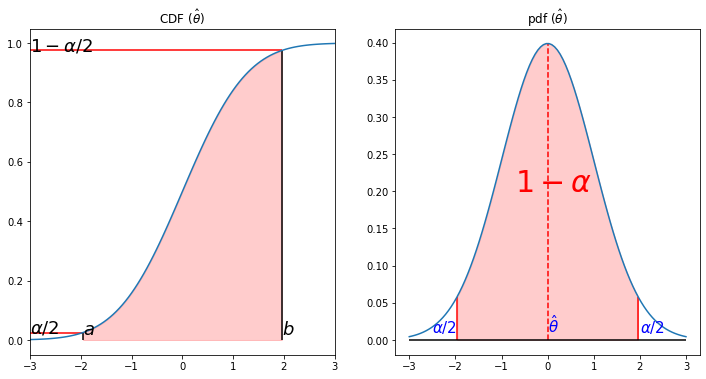

In [6]:
# Visual interpretation of the CI around the mean for a normal distribution
# let's take alpha = 0.05 => we are interested in a 95% confidence interval 
alpha = 0.05
# Let's consider a confidence interval for a normal distribution 
norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
# Plotting of the normal distribution
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[1].plot(x, norm.pdf(x))
ax[0].plot(x, norm.cdf(x))  

# We use ppf (i.e. inverse of the CDF) to find a, b such taht p(theta in [a, b]) <= 1 - alpha
a, b = norm.ppf(alpha/2.), norm.ppf(1-alpha/2.)

# Plotting of horizontal and vertical lines + filled area representing the probability on the CDF 
ax[0].hlines(alpha/2., -3, a, color='red')
ax[0].hlines(1.-alpha/2., -3, b, color='red')
ax[0].vlines(a, 0., norm.cdf(a))
ax[0].vlines(b, 0., norm.cdf(b))
ax[0].fill_between(np.linspace(a, b, 100), 0, norm.cdf(np.linspace(a, b, 100)), color='red', alpha=0.2)
ax[0].annotate(r'$\alpha/2$', (-3, alpha/2.), fontsize=18.)
ax[0].annotate(r'$1-\alpha/2$', (-3, 1.-alpha/2.), fontsize=18.)
ax[0].annotate(r'$a$', (a, 0.02), fontsize=18.)
ax[0].annotate(r'$b$', (b, 0.02), fontsize=18.)

# Plotting of horizontal and vertical lines + filled area representing the probability on the PDF 
cv1 = ax[1].vlines(a, 0, norm.pdf(a), color='red')
cv2 = ax[1].vlines(b, 0, norm.pdf(b), color='red')
cm = ax[1].vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = ax[1].hlines(0, -3, 3, color='black')
ax[0].set_xlim(-3,3)
ax[1].fill_between(np.linspace(a, b, 100), 0, norm.pdf(np.linspace(a, b, 100)), color='red', alpha=0.2)
ax[1].text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
ax[1].text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(2., 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)
ax[1].set_title(r'pdf ($\hat{\theta}$)')
ax[0].set_title(r'CDF ($\hat{\theta}$)');

Drawing a confidence interval around $\theta$ can be done based on $\hat{\theta}$. Defining a region around $\theta$ such that $\hat{\theta}$ has a $1-\alpha$ probability to be in that region is then equivalent to defining a region around $\hat{\theta}$ such that $\theta$ has a $1-\alpha$ probability to be in that region (as on the figure above). Defining this region, consists in finding by "how many standard error" the mean value of our parameter can be off its  estimator. That allows us to also write the confidence interval as   

$$
\hat{\theta} \pm (multiplier) \times \, stde({\theta}),
$$

where $\hat{\theta}$ is your *point-estimate* of $\theta$, and $stde(\theta)$ is the *standard error* on $\theta$. To find this *multiplier*, we often need to study the pdf of a "normalised" random variable: $(\hat{\theta} - \theta) / stde(\theta)$. When this random variable is equal to 1, it means that the parameter $\theta$ deviates by 1 standard error from its estimate. We can thus find the value of the *multiplier* from the PDF (and CDF) of this normalised random variable. E.g. is this PDF is Gaussian, a multiplier of 1.96, will yield a 95\% confidence interval.  

For a one sided confidence interval:

$$
p(\theta < b) \leq 1-\alpha. 
$$. 

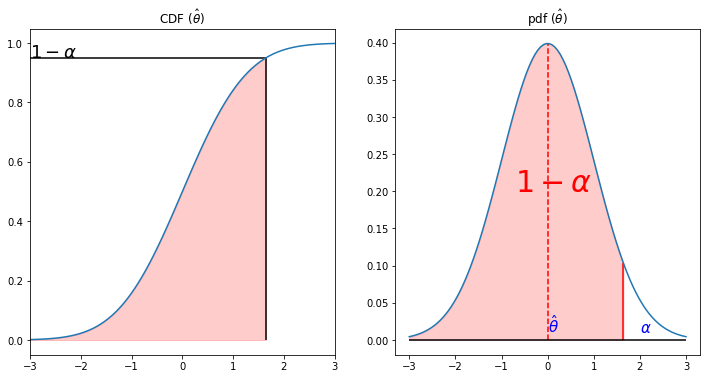

In [4]:
# same procedure as above for p(theta < b) < 1-alpha
alpha = 0.05
norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[1].plot(x, norm.pdf(x))
ax[0].plot(x, norm.cdf(x))

b =  norm.ppf(1-alpha)
ax[0].hlines(1.-alpha, -3, b, color='black')
ax[0].vlines(b, 0., norm.cdf(b))
ax[0].fill_between(np.linspace(-3, b, 100), 0, norm.cdf(np.linspace(-3,  b, 100)), color='red', alpha=0.2)
ax[0].annotate(r'$1-\alpha$', (-3, 1.-alpha), fontsize=18.)

cv2 = ax[1].vlines(b, 0, norm.pdf(b), color='red')
cm = ax[1].vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = ax[1].hlines(0, -3, 3, color='black')
ax[0].set_xlim(-3,3)
ax[1].fill_between(np.linspace(-3, b, 100), 0, norm.pdf(np.linspace(-3, b, 100)), color='red', alpha=0.2)
ax[1].text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
#ax[1].text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(2., 0.01,r'$\alpha$', color='blue', fontsize=15)
ax[1].text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)
ax[1].set_title(r'pdf ($\hat{\theta}$)')
ax[0].set_title(r'CDF ($\hat{\theta}$)');

#### II.2.1 Normal distribution with a known variance (z-confidence interval)

If $\{x_i\}$ is our sample of $N$ points drawn from a normal distribution of mean $\mu$ and width $\sigma$, then the estimator $\bar{x}$ follows a normal distribution $N(\mu, \sigma/\sqrt{N}$) (remember that your standard error on the mean, $stde = \sigma/\sqrt{N})$. This is equivalent to say that the distribution of the random variable $Z = (\bar{x}-\mu)/stde$ follows a normal distribution $N(0,1)$.     

If we define $z_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, such that $p(Z \leq z_{\alpha/2} ) = 1-\alpha/2$, then the confidence interval is simply: 

$$
CI_{\alpha} = [\bar{x}-z_{\alpha/2} \, stde , {\bar{x}}+z_{\alpha/2} \, stde] = [\bar{x}-z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}} , {\bar{x}}+z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}] 
$$

You can also write the CI as:
$$
 {\bar{x}} \pm z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}
$$

A 95% confidence interval would then be $[\bar{x}-1.96\,stde, \bar{x}-1.96\,stde]$, i.e. $z_{\alpha/2} = 1.96$. 

Text(0,0.01,'$\\hat{\\theta}$')

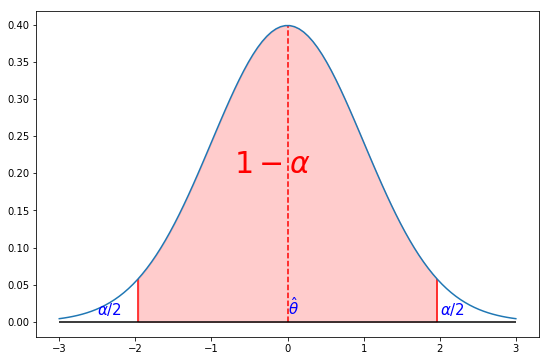

In [4]:
# Visual interpretation of the CI around the mean for a normal distribution

norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
plt.figure(figsize=(9, 6))
plt.plot(x, norm.pdf(x))
a1, a2 = norm.ppf(0.025), norm.ppf(1-0.025)
cv1 = plt.vlines(a1, 0, norm.pdf(a1), color='red')
cv2 = plt.vlines(a2, 0, norm.pdf(a2), color='red')
cm = plt.vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = plt.hlines(0, -3, 3, color='black')
plt.fill_between(np.linspace(a1, a2, 100), 0, norm.pdf(np.linspace(a1, a2, 100)), color='red', alpha=0.2)
plt.text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
plt.text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
plt.text(2., 0.01,r'$\alpha/2$', color='blue', fontsize=15)
plt.text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)

#### How to estimate $z_{\alpha/2}$ in `python` ? 

When the distribution of the variable is known, it is easy to get the confidence interval from the CDF using `scipy.stats.distribution.ppf(a)`. This function gives, for a probability $p(x < a)$ the corresponding value of x. 

In [7]:
alpha = 0.01
# Imagine that we have 10 data points drawn from a gaussian of mean 20, and width 3
mu, sigma = 20, 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)   # We generate our fake sample, i.e. draw 10 points from the Gaussian
print('My sample is ', x_sample)

My sample is  [21.16677612 18.56653966 25.07187533 20.46649978 19.30342815 16.17549402
 15.21698752 20.67092023 21.3353332  16.6403821 ]


The above points illustrate the situation where you have obtained 10 data points and you know that the uncertainty associated to each point is $\sigma_x = 3$

In [8]:
alpha = 0.01
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
# We consider the distribution of $Z = (\bar{x}-\mu)/stde$ which is N(0,1)
norm_Z = scipy.stats.norm(0,1)
stde = sigma/np.sqrt(Npts)
za1, za2 = norm_Z.ppf(alpha/2.), norm_Z.ppf(1-alpha/2.)
print('z_alpha/2, z_(1-alpha/2) = %.2f, %.2f' %(za1, za2))
a1, a2 = x_mean + za1 * stde, x_mean + za2 * stde
print("My %.2f percents confidence interval around %.2f is [%.2f,%.2f] - using stde" % ((1-alpha) * 100., x_mean, a1, a2))

z_alpha/2, z_(1-alpha/2) = -2.58, 2.58
My 99.00 percents confidence interval around 19.46 is [17.02,21.91] - using stde


In [9]:
# Alternatively, we can also calculate directely z_alpha/2 * stde. 
# The mean has a distribution N(x_mean, sigma/sqrt(N))
norm_mean = scipy.stats.norm(x_mean, sigma/np.sqrt(Npts))
a1, a2 = norm_mean.ppf(alpha/2.), norm_mean.ppf(1-alpha/2.)
print("My %.2f percents confidence interval around %.2f is [%.2f,%.2f] - using N(mu, sig/sqrt(N))" %((1-alpha) * 100., x_mean, a1, a2))

My 99.00 percents confidence interval around 19.46 is [17.02,21.91] - using N(mu, sig/sqrt(N))


In [10]:
# A second alternative using "interval" method (that takes 1-alpha as argument !)
a1, a2 = scipy.stats.norm.interval( (1-alpha), loc=x_mean, scale=sigma / np.sqrt(Npts) )
print("My %.2f percents confidence interval around %.2f is [%.2f,%.2f] - using scipy.interval" %((1-alpha) * 100., x_mean, a1, a2))

My 99.00 percents confidence interval around 19.46 is [17.02,21.91] - using scipy.interval


#### II.2.2 Interpretation of CI

An point to keep in mind, in interpreting confidence intervals in *a frequentist way*, is that a confidence interval **is not a probability statement about $\theta$** since $\theta $ is a fixed quantity (i.e. $\theta$ is NOT a random variable; only your estimator is a random variable). A 95% confidence interval means that if you repeat your observation over and over, then, 95% of the time $\theta$ will fall in your confidence interval. [Wasserman](#WAS04) suggests an alternative interpretation. Imagine that you measure one day one parameter $\theta_1$ and derive a 95% confidence interval $C_1$. The next day, you do it for another parameter $\theta_2$ (possibly associated to a different experiment), and get $C_2$. And so on. Imagine you did it for 100 parameters. Then, 95 times you will have trapped the true parameter value, and 5 times you won't. In other words, your confidence interval $C_n$ is a random variable.  

If you want to interpret a confidence interval as a statement about the probability that $\theta$ is in a given range, then you'll have to wait for our lecture on Bayesian inference. 

#### II.2.3 Normal distribution with *unknown variance*

In the case where the variance of our population is unknown, then, we use our estimator $\hat{\sigma} = \sqrt{1/(n-1) \, \sum_i (x_i-{\bar{x}})^2}$ instead of $\sigma$ to calculate the stde. 

The distribution of $(\bar{x}-\mu)/(\hat{\sigma} / \sqrt{N}$) is **not** a normal distribution, but almost. It is a Student's distribution (note that the inventor of the Student's distribution is not Mr Student but Mr R. Gosset who used the pseudonym of Student's for his publication).  

In that case our confidence interval can be re-written: 

$$
CI_{\alpha} = [\bar{x}-t_{\alpha/2} \, stde , {\bar{x}}+t_{\alpha/2} \, stde] = [\bar{x}-t_{\alpha/2} \, \frac{\hat{\sigma}}{\sqrt{N}} , {\bar{x}}+t_{\alpha/2} \, \frac{\hat{\sigma}}{\sqrt{N}}] , 
$$

where $t_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, and the CDF is the one of the Student's distribution. 

**Example**: 
Let's consider the following sample of 10 points drawn from a normal distribution $N(\mu=20, \sigma=3)$.    

In [12]:
npts = 10

norm = scipy.stats.norm(20, 3) # Distribution of mu = population distribution
x_sample = norm.rvs(Npts, random_state=12356)   # We generate our fake sample of 10 points
# let's calculate the mean and standard deviation from this sample
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
x_sigma = np.std(x_sample, ddof=1) # Estimated std of the sample
print('My sample of 10 points :', x_sample)
print('The estimated mean = %.2f' %x_mean)
print('The estimated stdev = %.2f' %x_sigma)

My sample of 10 points : [22.06175206 19.51152778 13.82140534 24.60985895 16.99651782 21.35627456
 22.79310352 20.32038921 18.64072816 22.13332573]
The estimated mean = 20.22
The estimated stdev = 3.14


Let's visualise the sample distribution (our 10 points) and the population distribution. 

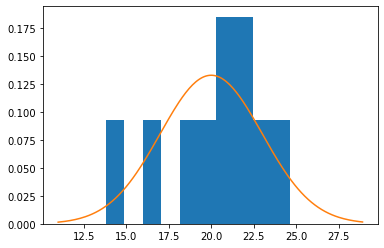

In [13]:
x = np.arange(11, 29, 0.1)
plt.hist(x_sample, density=True, label='Sample distribution')
plt.plot(x, norm.pdf(x), label='Population distribution')

We want to estimate an uncertainty (e.g. a 95% CI) on $\mu$ based on $\bar{x}$ (here $\bar{x}=$20.22). This means that we should derive by which amount we have to multiply the stde (standard error on the mean) such that there is 95% probability that the population mean (i.e. $\mu=$20) is in the CI. 

For this purpose, we may derive the confidence interval of the following random variable: $y = (\bar{x}-\mu) / stde$. By definition, the stde = $\sigma/\sqrt{npts}$ where $\sigma$ is the standard deviation of the distribution. However, we only have our sample of points, and do not know the "true" $\sigma$ (i.e. population) of the distribution (i.e. $\sigma$ = 3). We only have access to a point estimate of sigma, $s = \hat{\sigma} = 3.14$. As a consequence, $y$ does not distribute as a N(0, 1) (see [II.2.1](#II.2.1-Normal-distribution-with-a-known-variance)), but as a Student $t(N-1)$ distribution, where $N$ is the number of points of our sample. 

Let's compare the student's and normal distributions. 

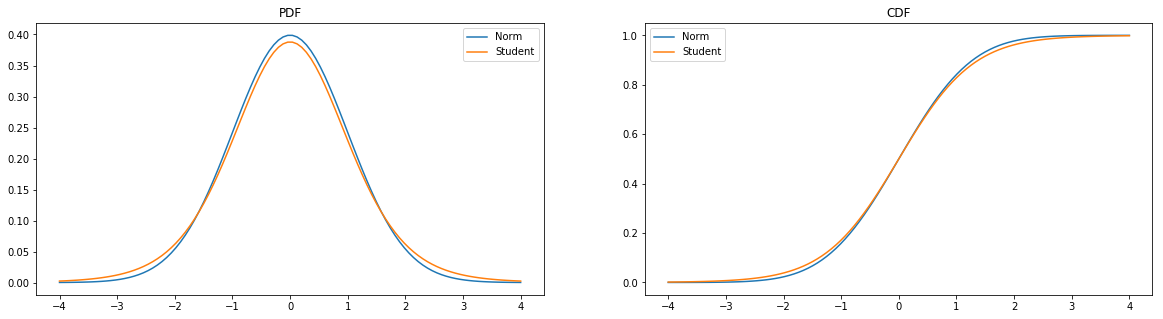

In [11]:
t_distrib = scipy.stats.t(npts-1)   # Distribution of t = x_mean-20 / x_sigma
norm_distrib = scipy.stats.norm(0, 1)  # Distribution of y =  x_mean-20 / 3.  # 3 = TRUE sigma 
x = np.linspace(-4, 4, 100)
# Plotting
tt=['PDF', 'CDF']
f, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].plot(x, norm_distrib.pdf(x), label='Norm')
ax[0].plot(x, t_distrib.pdf(x), label='Student')
ax[1].plot(x, norm_distrib.cdf(x), label='Norm')
ax[1].plot(x, t_distrib.cdf(x), label='Student')
[ax[i].legend() for i in range(2)]
[ax[i].set_title(tt[i]) for i in range(2)]
plt.show()

**Exercise:**

Let's consider the following sample of 10 points drawn from a normal distribution $N(\mu=20, \sigma=3)$

``` python
mu, sigma = 20, 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)  
```
Calculate a 99% confidence interval around the mean (for a stdev estimated from the data) and compare to the results we obtained when the stdev is known (i.e. you know that the true distribution has $\sigma = 3$).   

In [21]:
mu, sigma = 20, 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)

# We generate our fake sample, i.e. draw 10 points from the Gaussian
# Imagine this as if you were given a data file with 10 points 
x_sample = norm.rvs(Npts, random_state=12356)   

# You calculate the basic characteristics of you sample 
# Calculate the mean of our random variable
x_mean = np.mean(x_sample)
# Estimated std of the sample
x_std = np.std(x_sample, ddof=1)
# Estimated Standard error on the mean
x_stde = x_std/np.sqrt(Npts)

In [20]:
# 99% CI 
alpha = 0.01

# Calculation of CI for the mean, assuming that sigma is known 
# THIS IS not the case ... this is only for illustration / comparison 
stde = sigma/np.sqrt(Npts)    # "true" stde
norm_mean=scipy.stats.norm(0, 1)
za1, za2 = norm_mean.ppf(alpha/2.), norm_mean.ppf(1-alpha/2.)
a1, a2 = x_mean+za1*stde, x_mean+za2*stde 
print("Stde with sigma known = %.2f; Estimated stde %.2f" %(stde, x_stde) )

# Calculation of CI for the mean, assuming that sigma is derived from the sample => Student distribution
t_mean = scipy.stats.t(Npts-1)
t1, t2 = t_mean.ppf(alpha/2.), t_mean.ppf(1-alpha/2.)   # it is centered on a mean 0
at1, at2 = x_mean+t1*x_stde, x_mean+t2*x_stde 

# We can use the t.interval methdod of scipy
at1b, at2b = scipy.stats.t.interval(alpha = (1-alpha),              # Confidence level
                                    df= Npts-1,                     # Degrees of freedom
                                    loc = x_mean,                   # Sample mean
                                    scale = x_stde)                # Standard deviation estimate

print("z_a/2 = %.2f, t_a/2 = %.2f" %(za1, t1)  )
print("z_1-a/2 = %.2f, t_1-a/2 = %.2f" %(za2, t2)   )

print("**************************************" )
print("%.2f percents CI around %.2f is [%.2f,%.2f] when sigma is known" %((1-alpha)*100., x_mean, a1, a2) )
print("%.2f percents CI around %.2f is [%.2f,%.2f] when sigma is unknown" %((1-alpha)*100., x_mean, at1, at2) )
print("%.2f percents CI around %.2f is [%.2f,%.2f] when sigma is unknown (using interval)" %((1-alpha)*100., x_mean, at1b, at2b) )

Stde with sigma known = 0.95; Estimated stde 0.99
z_a/2 = -2.58, t_a/2 = -3.25
z_1-a/2 = 2.58, t_1-a/2 = 3.25
**************************************
99.00 percents CI around 20.22 is [17.78,22.67] when sigma is known
99.00 percents CI around 20.22 is [17.00,23.45] when sigma is unknown
99.00 percents CI around 20.22 is [17.00,23.45] when sigma is unknown (using interval)


We see that the CI should be larger when sigma is derived from the sample (i.e. we multiply the stde by 3.25 instead of 2.58). **However, note that it can happen that CI based on Student's distribution** is *smaller* than the one using the normal one ! This may happen if your estimate of the variance (or standard deviation) is substantially smaller than the population variance (or standard deviation). Indeed, the estimator of the variance has its specific distribution (a $chi^2$ distribution).

#### Other Confidence intervals: 

If you know the PDF of $\theta$, then calculating confidence intervals can be done by applying the procedure outlined above (Use of CDF -in particular CDF$^{-1}$ to derive the edges of your interval). If you don't, you first have to figure out what is the PDF. The notebook [Frequentist_inference_03.ipynb](Frequentist_inference_03.ipynb) gives a few more examples (CI on the variance, on the difference between two means, on proportions). Many other cases can be found in statistics books. See also the Penn state lecture on statistics: https://online.stat.psu.edu/stat414/.

## Summary

- A $p$ percents confidence interval on a parameter $\theta$ is a region [a,b] such that $p(\theta \in [a,b]) \leq p = 1-\alpha$. Hence, a value $\alpha=0.05$ allows one to define a 95% CI. 
- Confidence intervals can be one-sided ($p(\theta \in ]-\infty, \theta_{up}])$ or $p(\theta \in [\theta_{low}, +\infty[)$) or two-sided.
- The strategy to draw a confidence interval around $\theta$ is to look at the distribution of the normalised estimator $(\theta - \hat{\theta}) / stde(\theta)$ (which could be known theoretically or unknown) and define regions around $\hat{\theta}$ that contain/enclose (1-$\alpha) \times 100$% of the *probability distribution*. 
- The confidence interval around a mean is: 
    * $CI_{\alpha} = [\bar{x}-z_{\alpha/2} \, stde , {\bar{x}}+z_{\alpha/2} \, stde] = [\bar{x}-z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}} , {\bar{x}}+z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}]$ when $\sigma$ is known from the population. $z_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, where the CDF associated to a canonical gaussian $N(0,1)$. 
    * $CI_{\alpha} = [\bar{x}-t_{\alpha/2} \, stde , {\bar{x}}+t_{\alpha/2} \, stde] = [\bar{x}-t_{\alpha/2} \, \frac{\hat{\sigma}}{\sqrt{N}} , {\bar{x}}+t_{\alpha/2} \, \frac{\hat{\sigma}}{\sqrt{N}}]$ where $\hat{\sigma} = s$ is derived from the sample. $t_{\alpha/2} = CDF^{-1}(1-\alpha/2)$ for a CDF associated to a Student's distribution with $(n-1)$ degrees of freedom.
- A 95% CI corresponds to $z_{\alpha/2}$ = 1.96. So if you need to calculate a 95\% CI on the mean, and your CI is not too small, then you simply multiply your stde (standard error on the mean) by 1.96. For a 99% CI, $z_{\alpha/2}$ = 2.58. 
- In python, you can derive CI through the calculation of the ppf (e.g. [`scipy.stats.norm.ppf(alpha/2)`, `scipy.stats.norm.ppf(1-alpha/2)`] for a gaussian, [`scipy.stats.t.ppf(alpha/2)`, `scipy.stats.t.ppf(1-alpha/2)`] for a student `t` distribution), or using the `interval` method associated to the distribution (e.g. `scipy.stats.norm.interval(1-alpha)`). Note that `interval` takes `1-alpha` as an argument. 

## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  **STAT 415 Sect 6-7-8**

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9

**Videos**: 

* Introduction to confidence intervals based on proportions: https://www.youtube.com/watch?v=hlM7zdf7zwU

* Confidence intervals around the mean (sigma known): https://www.youtube.com/watch?v=KG921rfbTDw&list=PLvxOuBpazmsMdPBRxBTvwLv5Lhuk0tuXh&index=3

* Confidence intervals around the mean (sigma unknown): https://www.youtube.com/watch?v=a2rd4Qy8yNI

* Statistical interpretation of confidence interval: https://www.youtube.com/watch?v=MbXThbTSrVI

Other useful references to know more about the topics covered in this lecture: 

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.
